In [411]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Lab 2
These exercises focus on Pandas. Work through all exercises, searching for help when you need to (ie. frequently).

__EXERCISE 1: Pie shop__

_Objective: Create and manipulate DataFrames_
* Create a DataFrame with three columns: month, apple_pie_sales, blueberry_pie_sales
* Summarize which products sold best
* Create a new column to summarize revenues

In [2]:
# YOUR CODE HERE: create the df using the data supplied

sales_data = {'months' : ['Jan','Feb', 'Mar', 'Apr'],
                'apple_pie_sales' : [34, 19, 28, 45],
                'blueberry_pie_sales' : [18, 6, 15, 51]}

sales_dataframe = pd.DataFrame(sales_data)
sales_dataframe

,months,apple_pie_sales,blueberry_pie_sales
0,Jan,34,18
1,Feb,19,6
2,Mar,28,15
3,Apr,45,51


In [7]:
# YOUR CODE HERE: calculate total sales of apple pies and total sales of blueberry pies
# total_apple_sales = np.sum(sales_dataframe['apple_pie_sales'])

total_apple_sales = sales_dataframe['apple_pie_sales'].sum()
print(total_apple_sales)

total_blueberry_sales = np.sum(sales_dataframe['blueberry_pie_sales'])
total_blueberry_sales


126


90

In [68]:
sales_dataframe.loc[4] = ['Total', total_apple_sales, total_blueberry_sales]

sales_dataframe

,months,apple_pie_sales,blueberry_pie_sales
0,Jan,34,18
1,Feb,19,6
2,Mar,28,15
3,Apr,45,51
4,Total,126,90


In [7]:
# YOUR CODE HERE: create a new columns entitled apple_pie_revenue and blueberry_pie_revenue

# Hint: revenue = units sold * price. Use the prices below.
apple_pie_price = 12
blueberry_pie_price = 15

sales_dataframe['apple_pie_revenue'] = sales_dataframe['apple_pie_sales'] * apple_pie_price
sales_dataframe['blueberry_pie_revenue'] = sales_dataframe['blueberry_pie_sales'] * blueberry_pie_price
sales_dataframe

,months,apple_pie_sales,blueberry_pie_sales,apple_pie_revenue,blueberry_pie_revenue
0,Jan,34,18,408,270
1,Feb,19,6,228,90
2,Mar,28,15,336,225
3,Apr,45,51,540,765


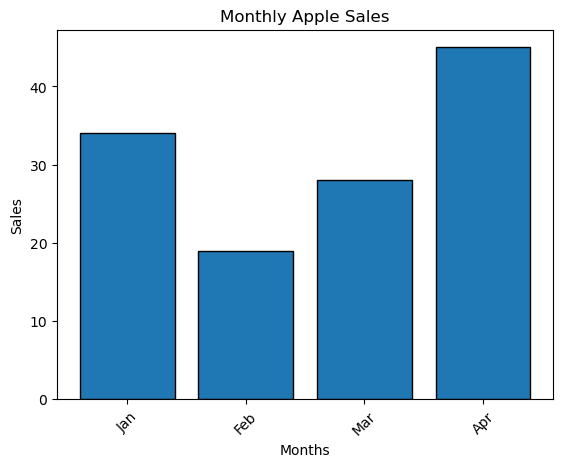

In [9]:
# BONUS: find a way to plot bar charts and pie charts (ha) of the shop's sales
months = sales_dataframe['months']
apple_sales =sales_dataframe['apple_pie_sales']
blueberry_sales =sales_dataframe['blueberry_pie_sales']
months

plt.bar(months, apple_sales, edgecolor='black')
plt.title('Monthly Apple Sales')
plt.ylabel('Sales')
plt.xlabel('Months')

plt.xticks(months, rotation=45)
plt.show()

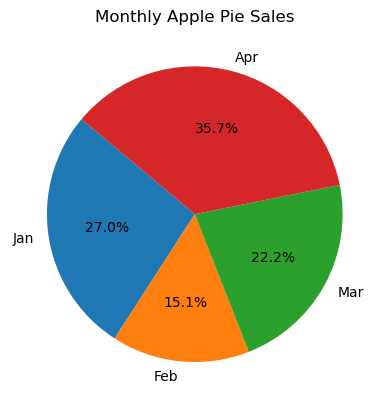

In [11]:
months = sales_dataframe['months']
apple_sales = sales_dataframe['apple_pie_sales']

plt.pie(apple_sales, autopct='%1.1f%%', labels=months, startangle=140)
plt.title('Monthly Apple Pie Sales')
plt.show()

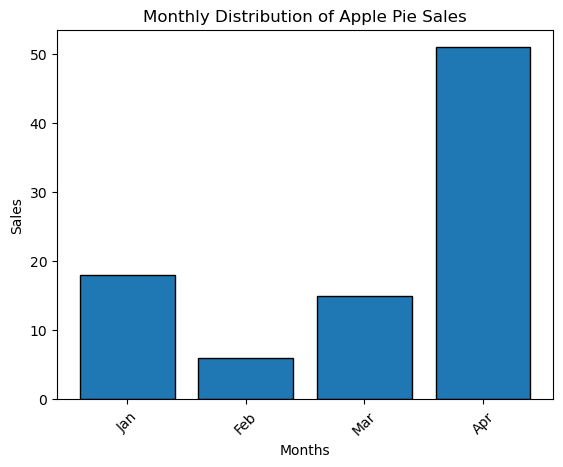

In [11]:
months = sales_dataframe['months'][0:4]
blueberry_sales =sales_dataframe['blueberry_pie_sales']

plt.bar(months,blueberry_sales, edgecolor='black')
plt.title('Monthly Distribution of Apple Pie Sales')
plt.ylabel('Sales')
plt.xlabel('Months')
plt.xticks(months, rotation=45)
plt.show()

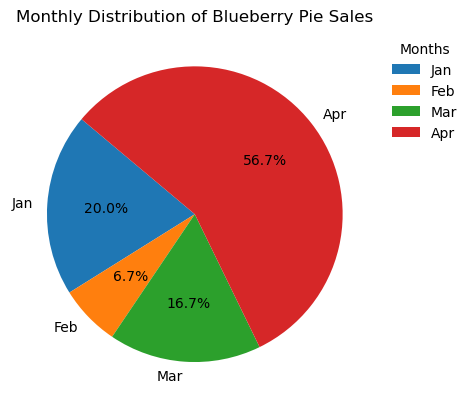

In [27]:
months = sales_dataframe['months']
blueberry_sales =sales_dataframe['blueberry_pie_sales']

plt.pie(blueberry_sales, autopct='%1.1f%%', labels=months, startangle=140)
plt.title('Monthly Distribution of Blueberry Pie Sales')
plt.legend(loc="upper left", bbox_to_anchor=(1,1), frameon=False, title="Months")
plt.show()

__EXERCISE 2: NYC housing__

_Objective: clean and manipulate a real-world dataset_

We are using the PLUTO (Primary Land Use Tax Lot Output) database, which lists every building in New York City.
Source is [NYC Open Data Portal](https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page). Check the [data dictionary](https://www1.nyc.gov/assets/planning/download/pdf/data-maps/open-data/pluto_datadictionary.pdf?r=18v2beta).

In [403]:
url = 'pluto_shorter.csv'
df = pd.read_csv(url)

C:\Users\ErickOndiwa\AppData\Local\Temp\ipykernel_9328\3945322138.py:2: DtypeWarning: Columns (18,19,21,23,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


__Step 1: Inspect and prepare the dataset__

In [405]:
# Use df.head() to see the first five rows. A bit messy, no?
df.head()

,Unnamed: 0,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,...,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,0,BX,5641.0,670.0,210.0,516.00,2.0,NaN,13.0,NaN,...,1.0,1.0,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
1,20,QN,4671.0,39.0,407.0,1039.00,2011.0,25.0,19.0,11357.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
2,40,BK,3925.0,32.0,305.0,1172.02,2004.0,19.0,37.0,11208.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
3,60,MN,1836.0,19.0,107.0,189.00,2002.0,3.0,7.0,10025.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
4,80,QN,8898.0,16.0,409.0,4.00,2001.0,27.0,30.0,11421.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018


In [377]:
# We'll select some columns to keep
df.columns

Index(['Unnamed: 0', 'borough', 'block', 'lot', 'cd', 'ct2010', 'cb2010',
       'schooldist', 'council', 'zipcode', 'firecomp', 'policeprct',
       'healtharea', 'sanitboro', 'sanitsub', 'address', 'zonedist1',
       'zonedist2', 'zonedist3', 'zonedist4', 'overlay1', 'overlay2',
       'spdist1', 'spdist2', 'spdist3', 'ltdheight', 'splitzone', 'bldgclass',
       'landuse', 'easements', 'ownertype', 'ownername', 'lotarea', 'bldgarea',
       'comarea', 'resarea', 'officearea', 'retailarea', 'garagearea',
       'strgearea', 'factryarea', 'otherarea', 'areasource', 'numbldgs',
       'numfloors', 'unitsres', 'unitstotal', 'lotfront', 'lotdepth',
       'bldgfront', 'bldgdepth', 'ext', 'proxcode', 'irrlotcode', 'lottype',
       'bsmtcode', 'assessland', 'assesstot', 'exemptland', 'exempttot',
       'yearbuilt', 'yearalter1', 'yearalter2', 'histdist', 'landmark',
       'builtfar', 'residfar', 'commfar', 'facilfar', 'borocode', 'bbl',
       'condono', 'tract2010', 'xcoord', 'ycoord'

In [379]:
borough_dict = {
                'BX': 'Bronx',
                'QN': 'Queens',
                'BK': 'Brooklyn',
                'MN': 'Manhattan',
                'SI': 'Staten Island'}
df['borough'] = df['borough'].map(borough_dict)

In [381]:
# Here is the key that translates NYC's land use codes into plain English (p. 17 of the data dictionary)
# We'll use the df.map() method to replace the numbers with text we can understand

# BONUS POINTS: repeat this step to substitute the short borough names (eg. MN) with the actual
# full borough names (eg. MN becomes Manhattan).

land_use_dict = {1: 'One & Two Family Buildings',
                2: 'Multi-Family Walk-Up Buildings',
                3: 'Multi-Family Elevator Buildings',
                4: 'Mixed Residential & Commercial Buildings',
                5: 'Commercial & Office Buildings',
                6: 'Industrial & Manufacturing',
                7: 'Transportation & Utility',
                8: 'Public Facilities & Institutions',
                9: 'Open Space & Outdoor Recreation',
                10: 'Parking Facilities',
                11: 'Vacant Land'}

df['landuse'] = df['landuse'].map(land_use_dict)

In [383]:
# Note how this syntax works. You could add extra columns that interest you.
my_cols = ['borough','numfloors','yearbuilt', 'landuse', 'zipcode', 'assesstot', 'xcoord','ycoord']
df = df[my_cols]

In [385]:
# Cleaner now, right?
df.head(20)

,borough,numfloors,yearbuilt,landuse,zipcode,assesstot,xcoord,ycoord
0,Bronx,0.00,0.0,Transportation & Utility,NaN,59400.0,1044510.0,246734.0
1,Queens,2.50,1925.0,One & Two Family Buildings,11357.0,29738.0,1035479.0,223657.0
2,Brooklyn,2.75,1920.0,One & Two Family Buildings,11208.0,27370.0,1015989.0,187871.0
3,Manhattan,6.00,1900.0,Multi-Family Walk-Up Buildings,10025.0,510300.0,994273.0,228915.0
4,Queens,2.00,1901.0,One & Two Family Buildings,11421.0,29020.0,1021269.0,190793.0
5,Brooklyn,2.00,1905.0,One & Two Family Buildings,11207.0,10866.0,1010221.0,187761.0
6,Staten Island,2.00,1984.0,One & Two Family Buildings,10312.0,40824.0,934072.0,143273.0
7,Bronx,5.00,1923.0,Multi-Family Walk-Up Buildings,10457.0,239850.0,1008614.0,245887.0
8,Staten Island,2.00,1995.0,One & Two Family Buildings,10309.0,34776.0,922513.0,135218.0
9,Queens,1.67,1955.0,One & Two Family Buildings,11412.0,27648.0,1054188.0,191448.0


__Step 2: Summarize data using mean(), min/max(), describe() etc.__
* Find out the average price of a building in Manhattan (MN) compared with Queens (QN)
* What was the most expensive building built in the year you were born?
* Compare average building

BONUS: find the average price for buildings in Brooklyn with 5-10 floors built between 2000-2010. Do the same for buildings in Manhattan and Queens with those characteristics.

In [247]:
# YOUR CODE HERE:
# Find out the average price of a building in Manhattan (MN) compared with Queens (QN)

manhattan_avg =  df[df['borough'] == 'Manhattan']['assesstot'].mean()
manhattan_avg

queens_avg =  df[df['borough'] == 'Queens']['assesstot'].mean()
queens_avg
# max_price = pd.max(df.loc)

161665.81471389646

In [391]:
# What was the most expensive building built in the year you were born?
max_price = df[df['yearbuilt'] == 2001]['assesstot'].max()
max_price

26759700.0

In [126]:
# Compare average building
avg_price = df[df['yearbuilt'] == year_born]['assesstot'].mean()
avg_price

393321.7073170732

In [249]:
#  find the average price for buildings in Brooklyn with 5-10 floors built between 2000-2010. Do the same for buildings 
# in Manhattan and Queens with those characteristics.
brook_price = df.query("borough == 'Brooklyn' and numfloors.between(5, 10) and yearbuilt.between(2000, 2010)").assesstot.mean()
print(brook_price)
manhattan_price = df.query("borough == 'Manhattan' and numfloors.between(5, 10) and yearbuilt.between(2000, 2010)").assesstot.mean()
print(manhattan_price)
queen_price = df.query("borough == 'Queens' and numfloors.between(5, 10) and yearbuilt.between(2000, 2010)").assesstot.mean()
print(queen_price)

2225754.603448276
4267863.0869565215
2035399.652173913


__Step 3: Exploratory visualization using Pandas plotting__

In [265]:
# Try using the function pandas.Series.value_counts
# It returns the unique count of values in a column
# BONUS: Could you produce this output only for Brooklyn?

brooklyn_counts = df[df['borough'] == 'Brooklyn'].landuse.value_counts()

brooklyn_counts

Series([], Name: count, dtype: int64)

__YOUR ACTION__: Look up the [pandas.Series.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html) function, and some [examples of how to use it](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).

Explore any questions that interest you about New York City's buildings by plotting charts, for example:
* How does price vary with age? (scatter of age vs. price)
* Does the breakdown of building types differ between boroughs? (pie chart of landuse)
* Which zip codes have most and fewest buildings?
* Where are the buildings located? (hint: try a scatter plot of xcoord and ycoord)


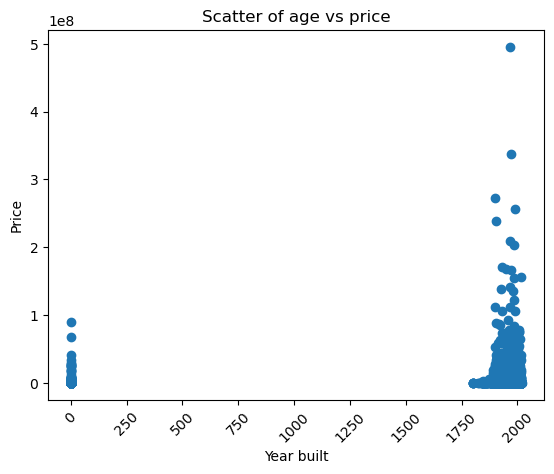

In [399]:
# YOUR CODE HERE:
# How does price vary with age? (scatter of age vs. price)

plt.scatter(df.yearbuilt, df.assesstot)
plt.title('Scatter of age vs price')
plt.xlabel('Year built')
plt.xticks(rotation=45)
plt.ylabel('Price')
plt.show()


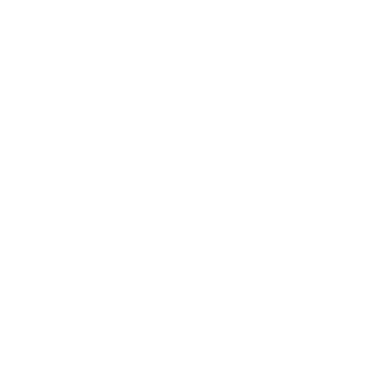

In [423]:
# Does the breakdown of building types differ between boroughs? (pie chart of landuse)
landuse = df.groupby('landuse').value_counts()
plt.pie(landuse, autopct='%.2f%%', startangle=140)

plt.show()

In [175]:
# Which zip codes have most and fewest buildings?
most_building = df.zipcode.value_counts().idxmax()
print(most_building)
fewest_building = df.zipcode.value_counts().idxmin()
print(fewest_building)

10314.0
10278.0


In [217]:
# Where are the buildings located? (hint: try a scatter plot of xcoord and ycoord)
x_coord = df.xcoord
plt.scatter(df.xcoord, df.ycoord, color='blue', alpha=0.6, edgecolors='black')
# plt.show()

#### BONUS ADVANCED QUESTION!
Impute missing values for year_built using a custom strategy:
* Replace all NaNs with the mean year_built for buildings of the same `landuse`.
* More advanced version: replace all NaNs with mean `year_built` for buildings of the same `landuse` in the same borough. (eg. multi-family buildings in Brooklyn)

In [365]:
df = df.groupby('landuse').fillna(df.yearbuilt.mean())
df.head(20)



C:\Users\ErickOndiwa\AppData\Local\Temp\ipykernel_9328\3855694532.py:1: FutureWarning: DataFrameGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use DataFrame.fillna instead
  df = df.groupby('landuse').fillna(df.yearbuilt.mean())


,borough,numfloors,yearbuilt,zipcode,assesstot,xcoord,ycoord
0,Queens,2.5,1930.0,11420.0,21854.0,1033818.0,186264.0
1,Queens,3.0,1949.0,11427.0,766350.0,1054215.0,204764.0
2,Queens,2.0,1940.0,11412.0,21878.0,1053265.0,193697.0
3,Queens,2.0,1945.0,11379.0,32703.0,1016853.0,203000.0
4,Queens,2.0,1925.0,11433.0,13186.0,1043147.0,190461.0
5,Queens,2.5,1930.0,11434.0,21105.0,1044716.0,189567.0
6,Queens,2.0,1950.0,11412.0,26136.0,1053188.0,190513.0
7,Bronx,1.0,1905.0,10465.0,25885.0,1034353.0,248094.0
8,Queens,1.0,1950.0,11422.0,18936.0,1058906.0,185717.0
9,Staten Island,2.5,1930.0,10310.0,22020.0,953932.0,169156.0


In [386]:
df = df.groupby(['borough', 'landuse']).fillna(df.yearbuilt.mean())
df.head(20)

C:\Users\ErickOndiwa\AppData\Local\Temp\ipykernel_9328\3043285198.py:1: FutureWarning: DataFrameGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use DataFrame.fillna instead
  df = df.groupby(['borough', 'landuse']).fillna(df.yearbuilt.mean())


,numfloors,yearbuilt,zipcode,assesstot,xcoord,ycoord
0,6.0,1956.0,11375.000000,3000600.0,1025787.0,207006.0
1,2.0,1955.0,11364.000000,46614.0,1053047.0,207566.0
2,4.0,1931.0,11206.000000,338850.0,1000093.0,195607.0
3,2.0,1920.0,11369.000000,20780.0,1019325.0,216170.0
4,2.0,1935.0,11413.000000,25128.0,1055388.0,187527.0
5,3.0,1950.0,10469.000000,20376.0,1025728.0,260128.0
6,2.0,1925.0,11234.000000,21384.0,1005179.0,165917.0
7,0.0,0.0,1840.345399,360.0,1015046.0,202689.0
8,4.0,1910.0,11220.000000,388350.0,982450.0,174891.0
9,2.0,1999.0,11236.000000,53551.0,1006464.0,176803.0
